In [1]:
## Install Library
install.packages("BiocManager")
install.packages("metap")
library(pacman)
p_load(Seurat, patchwork, tidyverse, ggplot2, cowplot, harmony, SingleR, celldex, metap)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘qqconf’


Warning message in install.packages("metap"):
“installation of package ‘qqconf’ had non-zero exit status”
Warning message in install.packages("metap"):
“installation of package ‘metap’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘qqconf’


Warning message in utils::install.packages(package, ...):
“installation of package ‘qqconf’ had non-zero exit status”
Warning message in utils::install.packages(package, ...):
“installation of package ‘metap’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in p_install(package, character.only = TRUE, ...):
“”
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘metap’”
Warning message i

Load and Convert Dataset from h5ad file to Seurat object

In [2]:
## Load dataset
getwd()
data_dir <- '/scratch/BIOS555/clu89/Final project/GSE121638_Data' 

sample_ids <- c('GSM3440844_GU0700_T', 'GSM3440845_GU0715_T', 'GSM3440846_GU0744_T', 
               'GSM3440847_GU0700_P', 'GSM3440848_GU0715_P', 'GSM3440849_GU0744_P')

obj_list <- list()
for(sid in sample_ids){
    expression_matrix <- ReadMtx(
        mtx = sprintf("%s/%s_matrix.mtx", data_dir, sid), 
        features = sprintf("%s/%s_genes.tsv", data_dir, sid),
        cells = sprintf('%s/%s_barcodes.tsv', data_dir, sid)
    )
    obj_list[[sid]] <- CreateSeuratObject(counts = expression_matrix)
}

## Sample ID
head(obj_list)
ls()

[1] "/scratch/BIOS555/clu89/Final project"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


$GSM3440844_GU0700_T
An object of class Seurat 
33694 features across 4859 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 1 layer present: counts

$GSM3440845_GU0715_T
An object of class Seurat 
33694 features across 4680 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 1 layer present: counts

$GSM3440846_GU0744_T
An object of class Seurat 
33694 features across 2715 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 1 layer present: counts

$GSM3440847_GU0700_P
An object of class Seurat 
33694 features across 5850 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 1 layer present: counts

$GSM3440848_GU0715_P
An object of class Seurat 
33694 features across 5125 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 1 layer present: counts

$GSM3440849_GU0744_P
An object of class Seurat 
33694 features across 2459 samples within 1 ass

[1] "data_dir"          "expression_matrix" "obj_list"         
[4] "sample_ids"        "sid"

Quality Control and Data Management

,orig.ident,nCount_RNA,nFeature_RNA
,<chr>,<dbl>,<int>
GSM3440844_GU0700_T_AAACCTGAGTAGCCGA-1,SeuratProject,5620,1939
GSM3440844_GU0700_T_AAACCTGAGTGGTAAT-1,SeuratProject,4328,1432
GSM3440844_GU0700_T_AAACCTGAGTGTCCCG-1,SeuratProject,4576,1342
GSM3440844_GU0700_T_AAACCTGCAAAGGTGC-1,SeuratProject,3989,1374
GSM3440844_GU0700_T_AAACCTGCAGGTGCCT-1,SeuratProject,11744,2348
GSM3440844_GU0700_T_AAACCTGGTATCGCAT-1,SeuratProject,3403,1461
GSM3440844_GU0700_T_AAACCTGGTCCAGTTA-1,SeuratProject,23284,3690
GSM3440844_GU0700_T_AAACCTGGTCTGATTG-1,SeuratProject,3759,1264
GSM3440844_GU0700_T_AAACCTGGTGACTCAT-1,SeuratProject,4074,1540


,orig.ident,nCount_RNA,nFeature_RNA,sample,patient,type,barcode
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
GSM3440844_GU0700_T_AAACCTGAGTAGCCGA-1,SeuratProject,5620,1939,GSM3440844,GU0700,T,AAACCTGAGTAGCCGA-1
GSM3440844_GU0700_T_AAACCTGAGTGGTAAT-1,SeuratProject,4328,1432,GSM3440844,GU0700,T,AAACCTGAGTGGTAAT-1
GSM3440844_GU0700_T_AAACCTGAGTGTCCCG-1,SeuratProject,4576,1342,GSM3440844,GU0700,T,AAACCTGAGTGTCCCG-1
GSM3440844_GU0700_T_AAACCTGCAAAGGTGC-1,SeuratProject,3989,1374,GSM3440844,GU0700,T,AAACCTGCAAAGGTGC-1
GSM3440844_GU0700_T_AAACCTGCAGGTGCCT-1,SeuratProject,11744,2348,GSM3440844,GU0700,T,AAACCTGCAGGTGCCT-1
GSM3440844_GU0700_T_AAACCTGGTATCGCAT-1,SeuratProject,3403,1461,GSM3440844,GU0700,T,AAACCTGGTATCGCAT-1
GSM3440844_GU0700_T_AAACCTGGTCCAGTTA-1,SeuratProject,23284,3690,GSM3440844,GU0700,T,AAACCTGGTCCAGTTA-1
GSM3440844_GU0700_T_AAACCTGGTCTGATTG-1,SeuratProject,3759,1264,GSM3440844,GU0700,T,AAACCTGGTCTGATTG-1
GSM3440844_GU0700_T_AAACCTGGTGACTCAT-1,SeuratProject,4074,1540,GSM3440844,GU0700,T,AAACCTGGTGACTCAT-1


[1] "GSM3440844" "GSM3440845" "GSM3440846" "GSM3440847" "GSM3440848"
[6] "GSM3440849"

[1] "GU0700" "GU0715" "GU0744"

[1] "T" "P"

GSM3440844_GU0700_T_AAACCTGAGTAGCCGA-1 GSM3440844_GU0700_T_AAACCTGAGTGGTAAT-1 
                              1.903915                               3.766174 
GSM3440844_GU0700_T_AAACCTGAGTGTCCCG-1 GSM3440844_GU0700_T_AAACCTGCAAAGGTGC-1 
                              4.414336                               3.459514 
GSM3440844_GU0700_T_AAACCTGCAGGTGCCT-1 GSM3440844_GU0700_T_AAACCTGGTATCGCAT-1 
                              3.686989                               4.231560

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



An object of class Seurat 
33694 features across 14850 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 6 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6

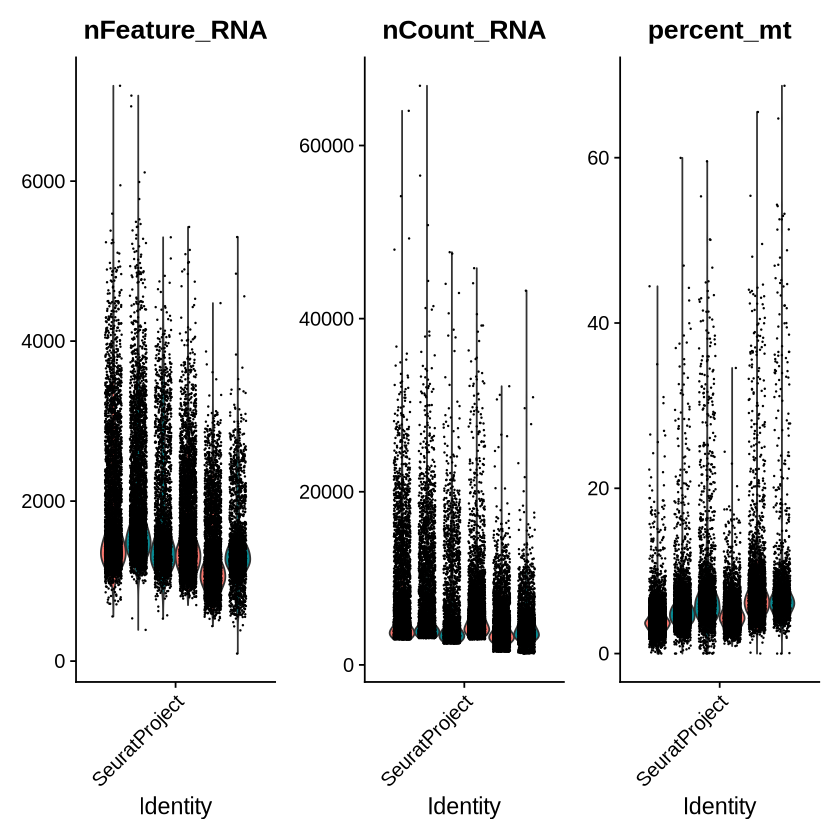

In [3]:

## Merge dataset
merged_obj <- merge(x = obj_list[[1]], y = obj_list[-1], add.cell.ids = ls(obj_list))
View(merged_obj@meta.data)

## Split column names
merged_obj$sample <- rownames(merged_obj@meta.data)
merged_obj@meta.data <- separate(merged_obj@meta.data, col = "sample",
                                 into = c("sample", "patient", "type", "barcode"), sep = "_")

View(merged_obj@meta.data)
unique(merged_obj$sample)
unique(merged_obj$patient)
unique(merged_obj$type)

# calculate MT percentage
    merged_obj$percent_mt <- PercentageFeatureSet(merged_obj, pattern = "^MT-")

head(merged_obj$percent_mt)

## Violin Plot
VlnPlot(merged_obj, 
        features = c("nFeature_RNA", "nCount_RNA", "percent_mt"), 
        ncol = 3,
        layer = 'counts',
        split.by = "sample")

## Subset dataset
merged_obj <- subset(merged_obj,
                     nCount_RNA < 5000 & percent_mt < 15)
merged_obj

Standard workflow to identify batch effect  

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Centering and scaling data matrix

PC_ 1 
Positive:  LYZ, FCN1, S100A9, S100A8, CST3, SERPINA1, VCAN, CSTA, S100A12, SPI1 
	   CD14, CSF3R, CD68, LST1, CFD, CD302, MNDA, AIF1, MS4A6A, NCF2 
	   CYBB, CD36, CLEC7A, CPVL, MAFB, CFP, FPR1, MPEG1, SLC11A1, CD300E 
Negative:  RPS27, CD3E, BTG1, IFITM1, CD69, IL32, RPS19, CST7, CCL5, RPS6 
	   NKG7, RPS5, TRBC2, EEF1A1, RPS18, GZMA, HSPA8, CD3D, CD7, CXCR4 
	   CTSW, CD247, ZFP36L2, CD2, RPS12, DUSP2, LEPROTL1, SRSF7, TSC22D3, PRF1 
PC_ 2 
Positive:  SRGN, CST7, NKG7, CCL5, GZMA, PRF1, CCL4, TMSB4X, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14850
Number of edges: 585764

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9746
Number of communities: 11
Elapsed time: 1 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
03:15:56 UMAP embedding parameters a = 0.9922 b = 1.112

03:15:56 Read 14850 rows and found 30 numeric columns

03:15:56 Using Annoy for neighbor search, n_neighbors = 30

03:15:56 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

03:15:58 Writing NN index file to temp file /tmp/RtmpSbcWXw/file169bca1ff98f64

03:15:58 Searching Annoy index using 1 thread, search_k = 3000

03:16:01 Annoy recall = 100%

03:16:02 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbor

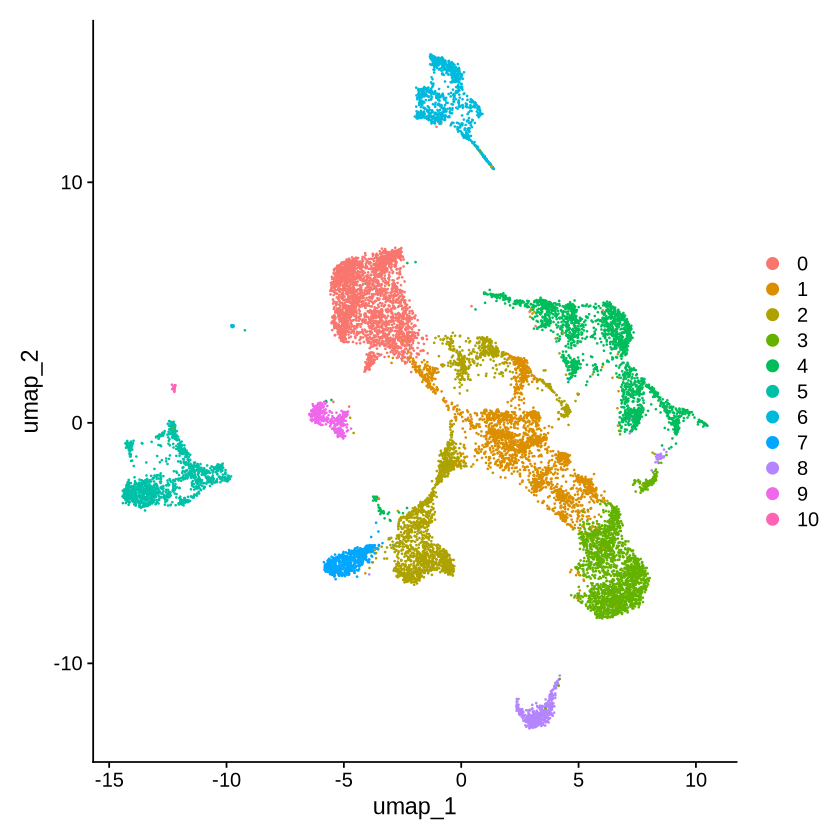

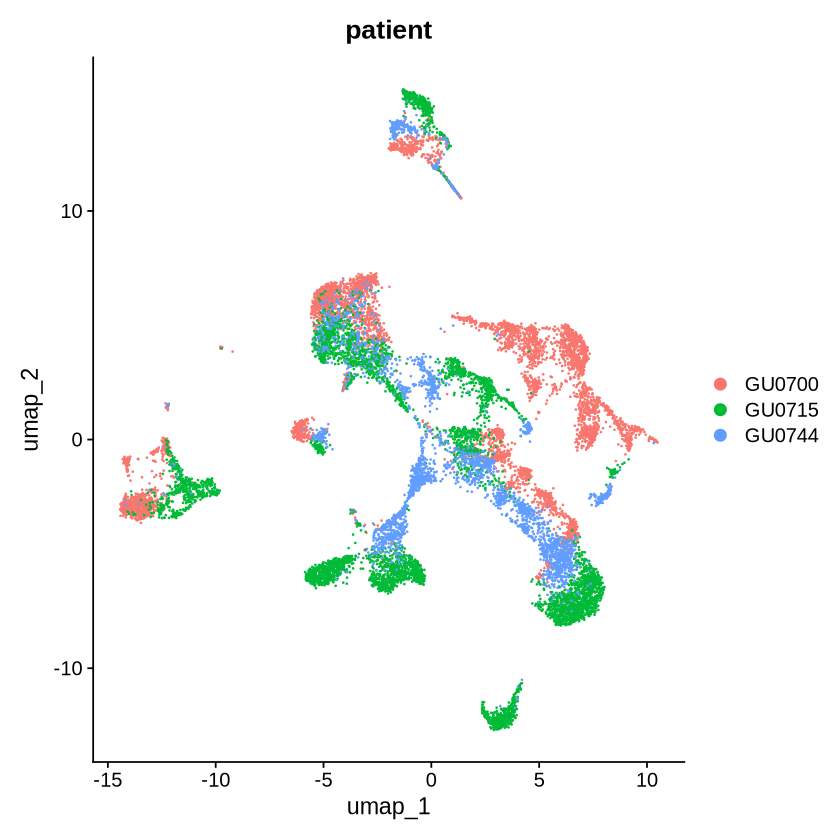

In [4]:

## Normalization
## Highly Variable Gene Selection
## Data Scaling
## PCA analysis
## Find nearest neighbors
## Clustering
## Run UMAP
merged_obj <- NormalizeData(object = merged_obj)
merged_obj <- FindVariableFeatures(object = merged_obj)
merged_obj <- ScaleData(object = merged_obj)
merged_obj <- RunPCA(object = merged_obj)
merged_obj <- FindNeighbors(merged_obj, dim = 1:30)
merged_obj <- FindClusters(merged_obj, resolution = 0.1)
merged_obj <- RunUMAP(merged_obj, dims = 1:30)

## Dimension plot group by patient and tissue type
p1 <- DimPlot(merged_obj, reduction = "umap")
p2 <- DimPlot(merged_obj, reduction = "umap", group.by = "patient")
p1
p2

Batch effect correction

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14850
Number of edges: 610444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9735
Number of communities: 9
Elapsed time: 1 seconds


03:16:26 UMAP embedding parameters a = 0.9922 b = 1.112

03:16:26 Read 14850 rows and found 30 numeric columns

03:16:26 Using Annoy for neighbor search, n_neighbors = 30

03:16:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

03:16:27 Writing NN index file to temp file /tmp/RtmpSbcWXw/file169bca7691ebe8

03:16:27 Searching Annoy index using 1 thread, search_k = 3000

03:16:30 Annoy recall = 100%

03:16:31 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

03:16:33 Initializing from normalized Laplacian + noise (using RSpectra)

03:16:33 Commencing optimization for 200 epochs, with 651400 positive edges

03:16:42 Optimization finished

Warning message:
“HarmonyMatrix is deprecated and will be removed in the future from the API in

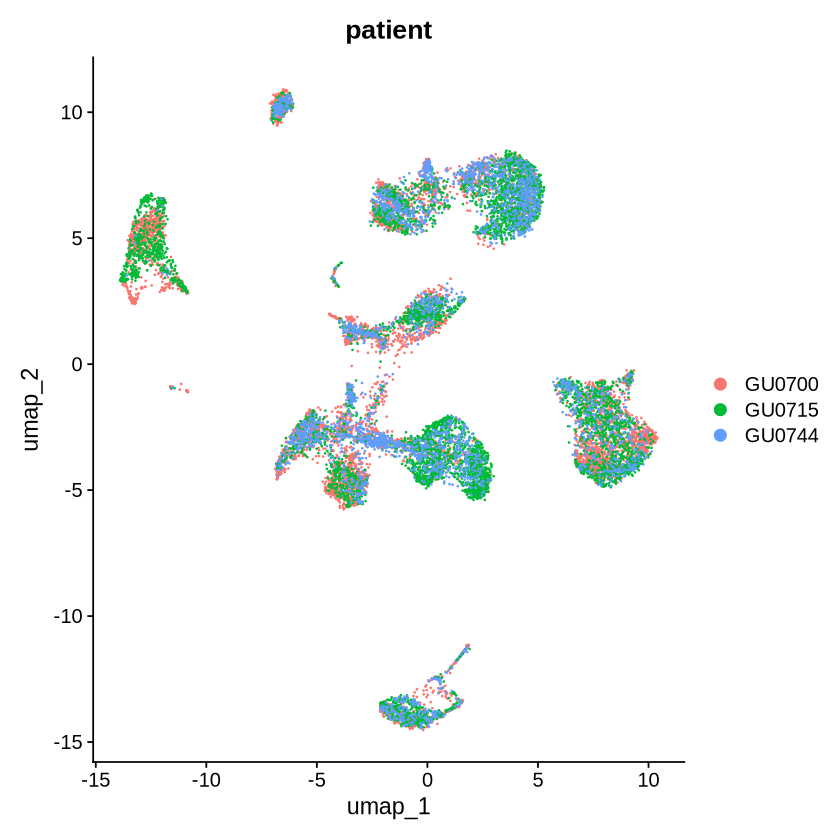

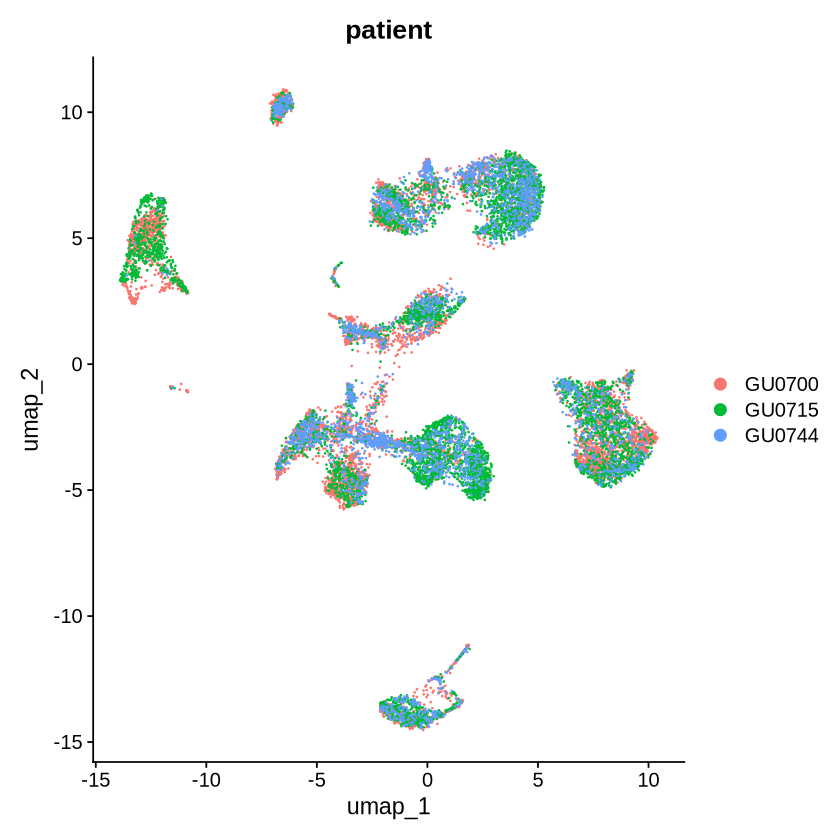

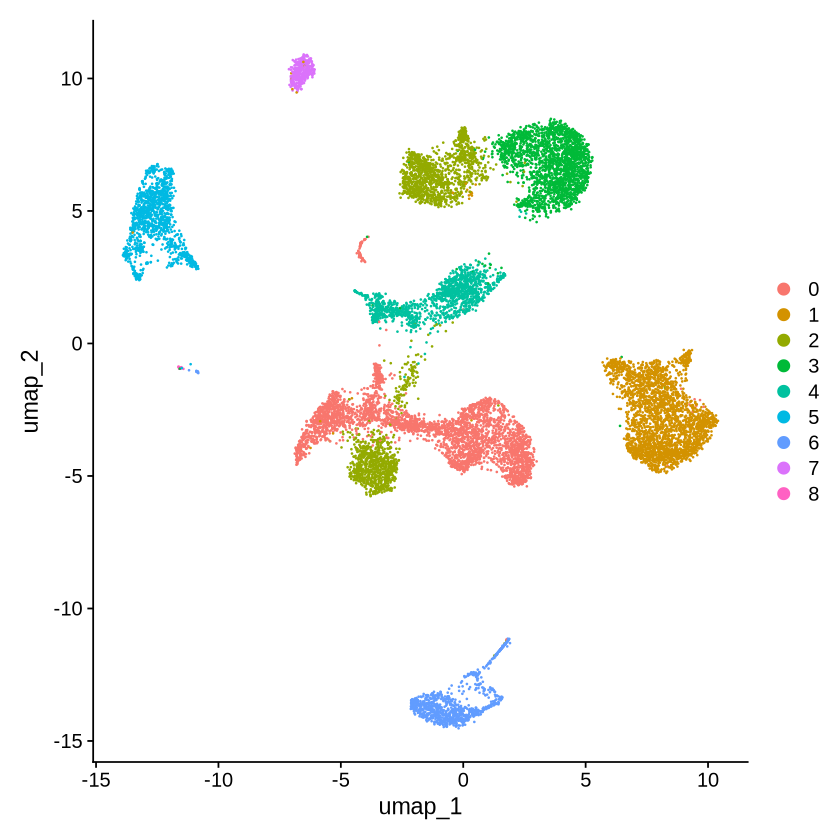

In [5]:
## Correction for batch effect
obj.harmony <- RunHarmony(merged_obj, group.by.vars = "patient")
obj.harmony.emb <- Embeddings(obj.harmony, "harmony")
obj.harmony <- FindNeighbors(obj.harmony, reduction = "harmony", dim = 1:30)
obj.harmony <- FindClusters(obj.harmony, resolution = 0.1)
obj.harmony <- RunUMAP(obj.harmony, reduction = "harmony", dims = 1:30)

## Dimension plot
p4 <- DimPlot(obj.harmony, reduction = "umap", group.by = "patient")
p4


## Data integration:
obj_merged <- IntegrateLayers(object = obj.harmony, 
                              method = HarmonyIntegration,
                              orig.reduction = "pca",
                              new.reduction = "harmony")

p5 <- DimPlot(obj_merged, reduction = "umap", group.by = "patient")
p6 <- DimPlot(obj_merged, reduction = "umap")
p5
p6


Cell type Inference

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache



DataFrame with 713 rows and 3 columns
           label.main             label.fine   label.ont
          <character>            <character> <character>
GSM112490          DC DC:monocyte-derived:..  CL:0000840
GSM112491          DC DC:monocyte-derived:..  CL:0000840
GSM112540          DC DC:monocyte-derived:..  CL:0000840
GSM112541          DC DC:monocyte-derived:..  CL:0000451
GSM112661          DC DC:monocyte-derived:..  CL:0000451
...               ...                    ...         ...
GSM556665    Monocyte Monocyte:S._typhimur..  CL:0000576
GSM92231      Neurons   Neurons:Schwann_cell  CL:0002573
GSM92232      Neurons   Neurons:Schwann_cell  CL:0002573
GSM92233      Neurons   Neurons:Schwann_cell  CL:0002573
GSM92234      Neurons   Neurons:Schwann_cell  CL:0002573

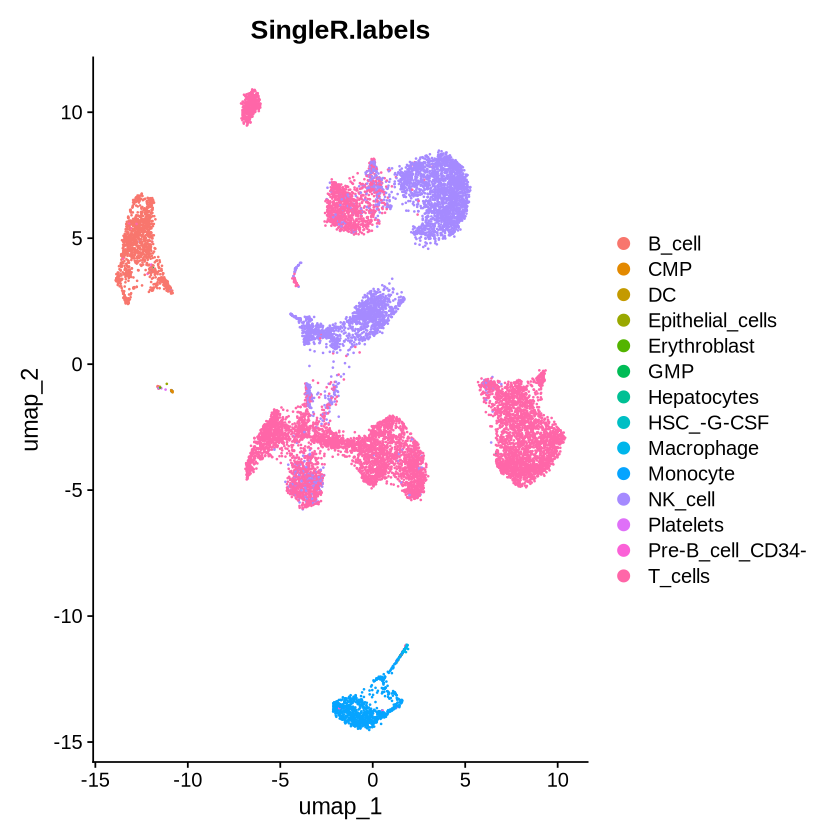

In [6]:

## Cell type annotation using reference dataset
ref <- celldex::HumanPrimaryCellAtlasData()
View(colData(ref))

obj_merged <- JoinLayers(obj_merged)
PBMC_count <- LayerData(obj_merged, layer = "counts")
pred <- SingleR(test = PBMC_count,
                ref = ref,
                labels = ref$label.main)
obj_merged$SingleR.labels <- pred$labels[match(rownames(obj_merged@meta.data), rownames(pred))]
p7 <- DimPlot(obj_merged, reduction = "umap", group.by = "SingleR.labels")
p7

Differentially Expressed Genes between samples and cell types

GSM3440844_GU0700_T_AAACCTGAGTGGTAAT-1 GSM3440844_GU0700_T_AAACCTGAGTGTCCCG-1 
                           "T_cells_T"                           "Monocyte_T" 
GSM3440844_GU0700_T_AAACCTGCAAAGGTGC-1 GSM3440844_GU0700_T_AAACCTGGTATCGCAT-1 
                           "T_cells_T"                            "NK_cell_T" 
GSM3440844_GU0700_T_AAACCTGGTCTGATTG-1 GSM3440844_GU0700_T_AAACCTGGTGACTCAT-1 
                           "T_cells_T"                            "T_cells_T"

GSM3440844_GU0700_T_AAACCTGAGTGGTAAT-1 GSM3440844_GU0700_T_AAACCTGAGTGTCCCG-1 
                             T_cells_T                             Monocyte_T 
GSM3440844_GU0700_T_AAACCTGCAAAGGTGC-1 GSM3440844_GU0700_T_AAACCTGGTATCGCAT-1 
                             T_cells_T                              NK_cell_T 
GSM3440844_GU0700_T_AAACCTGGTCTGATTG-1 GSM3440844_GU0700_T_AAACCTGGTGACTCAT-1 
                             T_cells_T                              T_cells_T 
GSM3440844_GU0700_T_AAACCTGTCACCCTCA-1 GSM3440844_GU0700_T_AAACCTGTCTGACCTC-1 
                             T_cells_T                              NK_cell_T 
GSM3440844_GU0700_T_AAACCTGTCTGCGGCA-1 GSM3440844_GU0700_T_AAACGGGAGCTAACTC-1 
                             T_cells_T                              T_cells_T 
GSM3440844_GU0700_T_AAACGGGCAGTCGATT-1 GSM3440844_GU0700_T_AAACGGGCATTAGGCT-1 
                             T_cells_T                              T_cells_T 
GSM3440844_GU0700_T_AAACGGGCATTGTGCA-1 GSM3440844_GU0700_T_AAACGGGTCAGTGCAT-1 
                             T_cells_T                              NK_cell_T 
GSM3440844_GU0700_T_AAACGGGTCCAAACAC-1 GSM3440844_GU0700_T_AAACGGGTCCTGCTTG-1 
                             NK_cell_T                              T_cells_T 
GSM3440844_GU0700_T_AAAGATGAGCAGGTCA-1 GSM3440844_GU0700_T_AAAGATGAGGCGATAC-1 
                             T_cells_T                              T_cells_T 
GSM3440844_GU0700_T_AAAGATGCAGCTCGCA-1 GSM3440844_GU0700_T_AAAGATGGTTATCCGA-1 
                             NK_cell_T                              T_cells_T 
GSM3440844_GU0700_T_AAAGATGGTTCCTCCA-1 GSM3440844_GU0700_T_AAAGATGTCCCAACGG-1 
                             NK_cell_T                              T_cells_T 
GSM3440844_GU0700_T_AAAGATGTCGGTCCGA-1 GSM3440844_GU0700_T_AAAGCAACAAACTGTC-1 
                             T_cells_T                              T_cells_T 
GSM3440844_GU0700_T_AAAGCAACACATTCGA-1 GSM3440844_GU0700_T_AAAGCAATCAACCAAC-1 
                             NK_cell_T                              NK_cell_T 
GSM3440844_GU0700_T_AAAGCAATCACCCGAG-1 GSM3440844_GU0700_T_AAAGCAATCTCACATT-1 
                              B_cell_T                              T_cells_T 
GSM3440844_GU0700_T_AAAGTAGAGGAGTAGA-1 GSM3440844_GU0700_T_AAAGTAGCAGTAAGCG-1 
                             NK_cell_T                               B_cell_T 
GSM3440844_GU0700_T_AAAGTAGTCGTAGGAG-1 GSM3440844_GU0700_T_AAAGTAGTCTCTGTCG-1 
                             NK_cell_T                              T_cells_T 
GSM3440844_GU0700_T_AAATGCCGTACAAGTA-1 GSM3440844_GU0700_T_AAATGCCTCAAGGCTT-1 
                             T_cells_T                              T_cells_T 
GSM3440844_GU0700_T_AAATGCCTCCTAGGGC-1 GSM3440844_GU0700_T_AACACGTAGCTAGTCT-1 
                             T_cells_T                               B_cell_T 
GSM3440844_GU0700_T_AACACGTGTAAGGATT-1 GSM3440844_GU0700_T_AACACGTGTAGCAAAT-1 
                             T_cells_T                              T_cells_T 
GSM3440844_GU0700_T_AACACGTGTTACGACT-1 GSM3440844_GU0700_T_AACACGTGTTATGCGT-1 
                            Monocyte_T                              NK_cell_T 
GSM3440844_GU0700_T_AACACGTGTTTGTTGG-1 GSM3440844_GU0700_T_AACACGTTCAACCATG-1 
                             T_cells_T                              NK_cell_T 
GSM3440844_GU0700_T_AACCATGAGGCAAAGA-1 GSM3440844_GU0700_T_AACCATGCACAACTGT-1 
                             NK_cell_T                              NK_cell_T 
GSM3440844_GU0700_T_AACCATGGTAAGTTCC-1 GSM3440844_GU0700_T_AACCATGGTCGGCATC-1 
                             T_cells_T                             Monocyte_T 
GSM3440844_GU0700_T_AACCATGTCTCGCATC-1 GSM3440844_GU0700_T_AACCGCGAGCCAGTTT-1 
                            Monocyte_T                              T_cells_T 
GSM3440844_GU0700_T_AACCGCGAGGCTAGCA-1 GSM3440844_GU0700_T_AACCGCGCATATGGTC-1 
                             T_cells_T                              T_cells_T 
GSM3440844_GU0700_T_AACCGCGTCTACGAGT-1 GSM3440844_

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'head': cannot xtfrm data frames


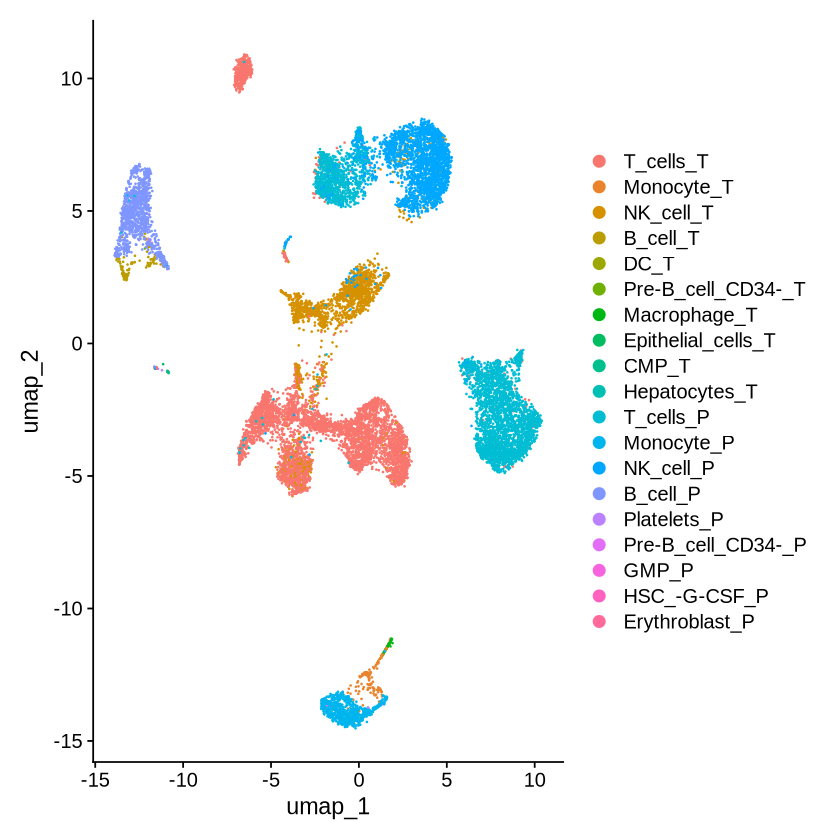

In [7]:

## Create labels for tisssues and cell type
obj_merged$Infer.sample <- paste(obj_merged$SingleR.labels, obj_merged$type, sep = "_")
head(obj_merged$Infer.sample)
Idents(obj_merged) <- obj_merged$Infer.sample
Idents(obj_merged)

DimPlot(obj_merged, reduction = "umap")

## Differentially gene expression between cancer and PBMC
T_cell.markers <- FindMarkers(obj_merged, ident.1 = "T_cells_T", ident.2 = "T_cells_P", test.use = "wilcox")
NK_cell.markers <- FindMarkers(obj_merged, ident.1 = "NK_cell_T", ident.2 = "NK_cell_P", test.use = "wilcox")
B_cell.markers <- FindMarkers(obj_merged, ident.1 = "B_cell_T", ident.2 = "B_cell_P", test.use = "wilcox")
Monocyte.markers <- FindMarkers(obj_merged, ident.1 = "Monocyte_T", ident.2 = "Monocyte_P", test.use = "wilcox")
head(order(T_cell.markers))
head(NK_cell.markers)
head(B_cell.markers)
head(Monocyte.markers)

## Create table for cell markers
T_cell.markers <- T_cell.markers[order(T_cell.markers$p_val_adj, decreasing = FALSE),]
NK_cell.markers <- NK_cell.markers[order(NK_cell.markers$p_val_adj, decreasing = FALSE),]
B_cell.markers <- B_cell.markers[order(B_cell.markers$p_val_adj, decreasing = FALSE),]
Monocyte.markers <- Monocyte.markers[order(Monocyte.markers$p_val_adj, decreasing = FALSE),]

write.csv(T_cell.markers, "/scratch/BIOS555/clu89/Final project/T_cell.markers.csv")
write.csv(NK_cell.markers, "/scratch/BIOS555/clu89/Final project/NK_cell.markers.csv")
write.csv(B_cell.markers, "/scratch/BIOS555/clu89/Final project/B_cell.markers.csv")
write.csv(Monocyte.markers, "/scratch/BIOS555/clu89/Final project/Monocyte.markers.csv")


In [14]:
## Create Heat map
plot_heat <- DoHeatmap(object = obj_merged)
ggsave("plot_heat.png")

ERROR: Error in grid.newpage(): could not open file 'scratch/BIOS555/clu89/Final project/heatmap.png'
